# The effect of learning rate, Optimizers on Neural Network Parameter Updation

#### What is the difference between an untrained neural network (Randomly initialized NN) and trained NN ? 

The trained NN has the values of parameters which are optimal. These values gives us low error rate/loss.

So while training the NN we start from random values of parameters and as the training goes further we get more optimal values of 
neural network parameters. To visualize the process of training lets consider a fully connected NN which has 300 neurons in one layer and 300 neurons in its adjacent layer. So there will be 300x300 connections between those two layers and each connection have a weight value which we first initialize randomly and after training those weight values becomes optimal. 
To visualize the training process let us make a matrix whose first row represents the weight values between first neuron to every other neuron in next layer, second row represents second neuron to every other neuron and so on. We will have 300 rows and 300 columns thus forming a matrix of 300x300. Let us treat that matrix as an image displayed below, 

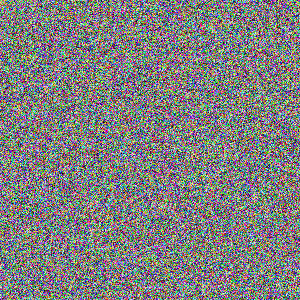

In [1]:
from fastai.vision import *
img_path = 'Image/1.jpeg'
img = open_image(img_path)
img = img.resize(300)
y = img.data.clone()
x = torch.rand_like(y)
x.requires_grad = True
Image(x.data)

Each pixel value is the weight which is to be updated to its optimal value which gives us low error. 
So lets consider the final optimal values of the weight matrix will form an image which looks like below,

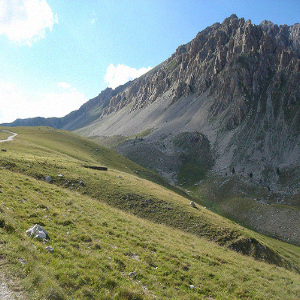

In [2]:
img

Now for the loss we will calculate the mean square error between random values and the optimal values and then by changing the learning rate and optimizers we will visualize the weight matrix as image to understand the effect of learning rate and optimizers on parameter updation.

## Loss Function 

In [3]:
def mse_loss(x,y): return F.mse_loss(x, y)*1000

In [4]:
def train(x,y,n_iter=10):
    losses=list()
    i = 0
    while(i < n_iter):
        optimizer.zero_grad()
        loss = mse_loss(x,y)
        loss.backward()
        optimizer.step()
        losses.append(float(loss.data))
        i+=1
        #print(f'At iteration {i} Loss is {float(loss.data)}')
    return losses

In [5]:
def train_from_scratch(x,y,n_iter=10,plot_losses=True):
    x.requires_grad = True
    losses = train(x,y,n_iter)
    if plot_losses is True:
        plt.figure(figsize=(8,8))
        plt.xlabel('iterations')
        plt.ylabel('loss')
        plt.plot(range(1,len(losses)+1),losses)
    return losses

# Training (Minimizing the MSE Loss) 

Now lets take an SGD as our optimizer and learning rate of 1 and see the loss graph, 

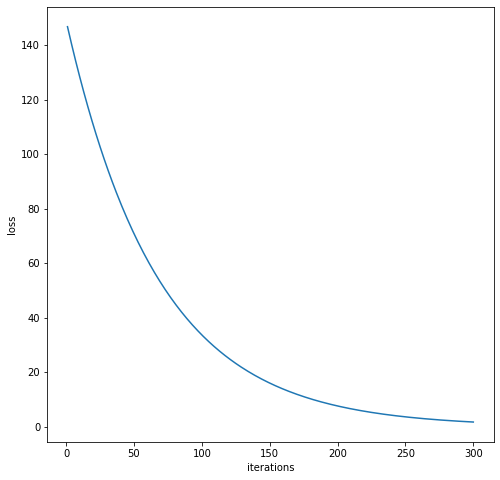

In [6]:
y = img.data.clone()
x = torch.rand_like(y)
optimizer = optim.SGD([x],lr=1)
losses = train_from_scratch(x,y,300)

we have read for a low learning rate our parameters will take time to converge, so let us experiment it.
Let us take the learning rate 10x smaller than above taken learning rate and observe the difference,

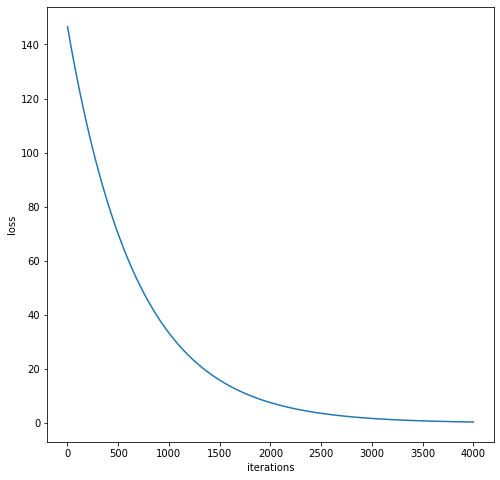

In [7]:
y = img.data.clone()
x = torch.rand_like(y)
optimizer = optim.SGD([x],lr=1e-1)
losses = train_from_scratch(x,y,4000)

We can observe that to get to the same loss value as compared to previous case we needed more number of iterations and our image looks like,

At loss 0.39098379015922546 Image looks like 


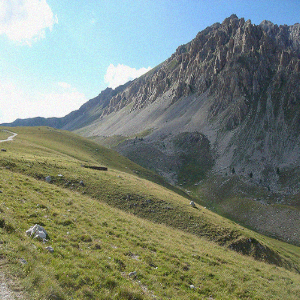

In [8]:
print(f'At loss {losses[-1]} Image looks like ')
Image(torch.clamp(x.data,0,1))

Now by keeping learning rate same as above case let us change the optimizer to Adam and observe when our parameter finds optimal values,

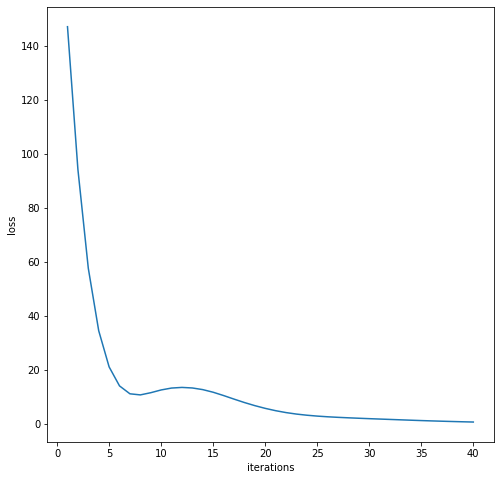

In [9]:
y = img.data.clone()
x = torch.rand_like(y)
optimizer = optim.Adam([x],lr=1e-1)
losses = train_from_scratch(x,y,40)

We required almost 10 times less iterations as compared to SGD with learning rate of one. For visualizing the parameters updating refer to following gif,

<img src='image/SGD_1_350.gif'>

The above gif is made by snapshoting the parameters values after every 50 iterations of SGD optimizer with learning rate of one.

No lets see now by increasing the learning rate can we reduce the number of iterations even more,

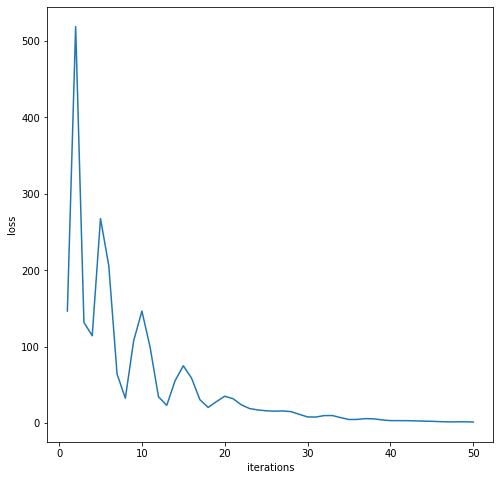

In [10]:
y = img.data.clone()
x = torch.rand_like(y)
optimizer = optim.Adam([x],lr=1)
losses = train_from_scratch(x,y,50)

Well that did not work as number of iterations required are the same to gen the less loss values, lets try increasing the learning rate even further,

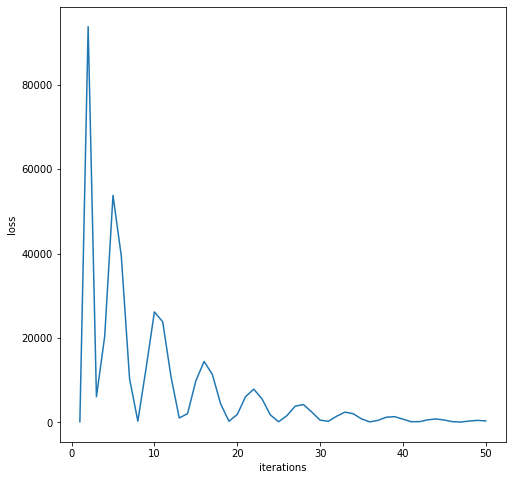

In [11]:
y = img.data.clone()
x = torch.rand_like(y)
optimizer = optim.Adam([x],lr=10)
losses = train_from_scratch(x,y,50)

That also did not work but Notice that as we are increasing the learnig rate loss starts to overshoot, If we increase the learning rate even more then we might not find the optimal values of our parameters. So to train NN properly we have to choose optimal learning rate and optimizer.

For optimizers most of the times Adam optimizer followed by SGD works but choosing the right optimizer does depend on your dataset For learning rate there are several techniques and blogs I would recommend reading <a href="https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0">this blog<a/> 